# Linear regression

## With `numpy`

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.style.use('seaborn')

In [122]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_data['MEDV'] = boston.target

c:\Users\titor\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [123]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [124]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Prediction based on one factor

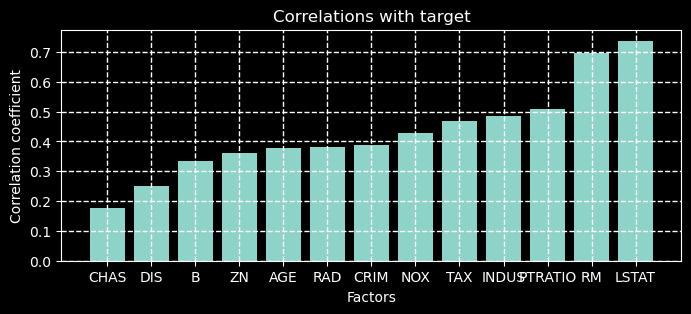

In [125]:
# Calculate abs correlation & sort it
corr_with_targe = boston_data.corr()['MEDV'].abs().sort_values()

# Drop target feature
corr_with_targe.drop('MEDV', inplace=True)

# Plot barplot
fig, ax = plt.subplots(figsize=(8, 3))
ax.bar(corr_with_targe.index, corr_with_targe.values)
ax.grid(linestyle='--', linewidth=1)
ax.set_title('Correlations with target')
ax.set_xlabel('Factors')
ax.set_ylabel('Correlation coefficient');

Ordinary Least Squares formula:
$$\bar{w}=(X^TX)^{-1}X^Ty=QX^Ty$$

In [126]:
X = boston_data[['LSTAT']]
y = boston_data['MEDV']

In [127]:
def linear_regression(X, y):
    ones = np.ones(shape=X.shape[0])    # Create vectors with ones
    X = np.column_stack([ones, X])      # Add column with ones
    Q = np.linalg.inv(X.T @ X)          # .T = .transpose()
    w = Q @ X.T @ y                     # @ = matrix multiplication
    return w

w = linear_regression(X, y)
print(f'Vector w: {w}')
print(f'w0: {w[0]:.2f}')
print(f'w1: {w[1]:.2f}')

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


In [128]:
# Predict target based on new income data
x_example = 5.18
y_predict = w[0] + w[1] * x_example
print(f'Predict value: {y_predict:.2f}')

Predict value: 29.63


In [129]:
# Visualization function of regression
def plot_regression_2d(X, y_true, y_pred, xlabel=None, ylabel=None):
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.scatter(X, y_true, alpha=0.5, label='Sample data')
    ax.plot(X, y_pred, color='red', label='Regression model')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()

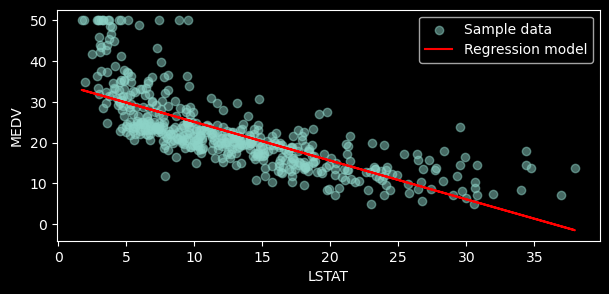

In [130]:
# Predict target for all objects in X
y_predict = w[0] + w[1] * X

plot_regression_2d(X, y, y_predict, xlabel='LSTAT', ylabel='MEDV')

## With `sklearn`

In [131]:
from sklearn import linear_model

### Prediction based on ONE factor

In [132]:
lr_lstat = linear_model.LinearRegression()  # Create class object
lr_lstat.fit(X, y)                          # Train the model

print(f'w0: {lr_lstat.intercept_:.2f}')
print(f'w1: {lr_lstat.coef_[0]:.2f}')

w0: 34.55
w1: -0.95


In [133]:
# Predict target for all objects in X
y_predict = lr_lstat.predict(X)

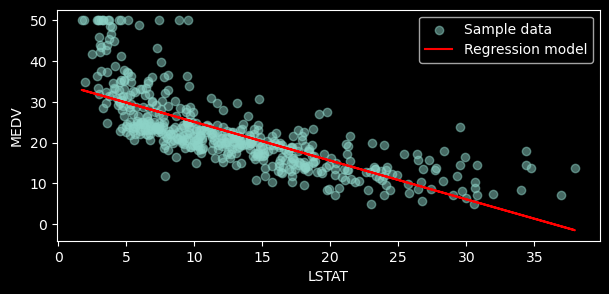

In [134]:
plot_regression_2d(X, y, y_predict, xlabel='LSTAT', ylabel='MEDV')

### Prediction based on ALL factors

In [135]:
X = boston_data.drop('MEDV', axis=1)
y = boston_data['MEDV']

In [136]:
lr_full = linear_model.LinearRegression()
lr_full.fit(X, y)

LinearRegression()

In [137]:
w_df = pd.DataFrame(
    {'Features': X.columns, 'Coefficients (wM)': lr_full.coef_})

intercept_df = pd.DataFrame(
    {'Features': ['Intercept (w0)'], 'Coefficients (wM)': lr_full.intercept_})

# Dataframe with coefficients and intercept
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
coef_df

,Features,Coefficients (wM)
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Visualization of errors

$$error_i=y_i-\^{y}_i$$

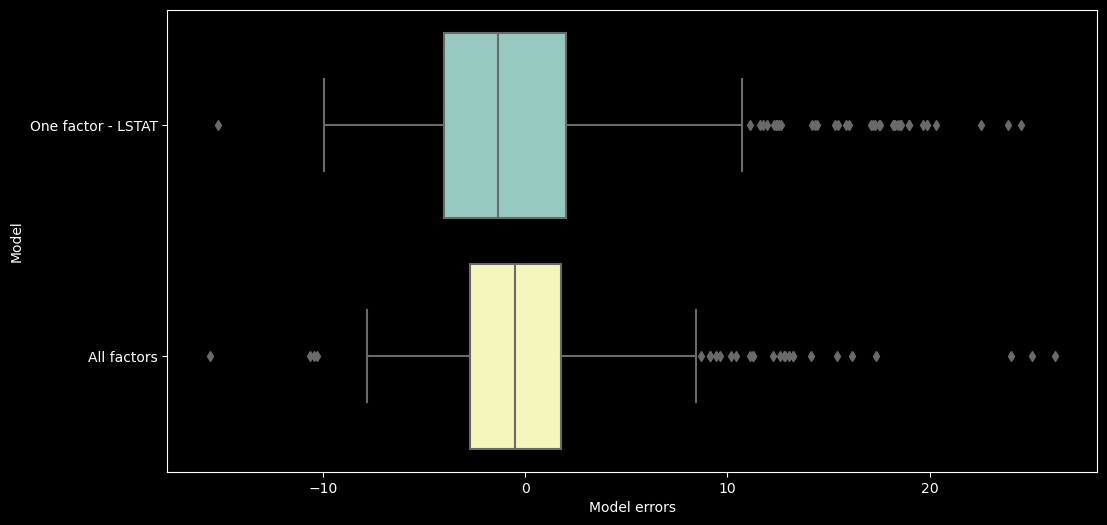

In [138]:
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])
y_errors_full = y - lr_full.predict(boston_data.drop('MEDV', axis=1))

errors_df = pd.DataFrame({
    'One factor - LSTAT': y_errors_lstat,
    'All factors': y_errors_full
    })

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors')
ax.set_ylabel('Model');

# Metrics

In [139]:
from sklearn import metrics

In [158]:
y_predict_lstat = lr_lstat.predict(boston_data[['LSTAT']])

print(f'MAE score: {metrics.mean_absolute_error(y, y_predict_lstat):.3f} thou. $')
print(f'RMSE score: {np.sqrt(metrics.mean_squared_error(y, y_predict_lstat)):.3f} thou. $')
print(f'MAPE score: {metrics.mean_absolute_percentage_error(y, y_predict_lstat) * 100:.3f} %')
print(f'R2 score: {metrics.r2_score(y, y_predict_lstat):.3f}')
print(f'MSE score: {metrics.mean_squared_error(y, y_predict_lstat):.3f}')

MAE score: 4.505 thou. $
RMSE score: 6.203 thou. $
MAPE score: 21.352 %
R2 score: 0.544
MSE score: 38.483


In [159]:
y_predict_full = lr_full.predict(boston_data.drop('MEDV', axis=1))

print(f'MAE score: {metrics.mean_absolute_error(y, y_predict_full):.3f} thou. $')
print(f'RMSE score: {np.sqrt(metrics.mean_squared_error(y, y_predict_full)):.3f} thou. $')
print(f'MAPE score: {metrics.mean_absolute_percentage_error(y, y_predict_full) * 100:.3f} %')
print(f'R2 score: {metrics.r2_score(y, y_predict_full):.3f}')
print(f'MSE score: {metrics.mean_squared_error(y, y_predict_full):.3f}')

MAE score: 3.271 thou. $
RMSE score: 4.679 thou. $
MAPE score: 16.417 %
R2 score: 0.741
MSE score: 21.895
